In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 100
niters = 1000
t_dist = Rosenbrock()

Not using ensemble, use isotropic gaussian proposal with scale=0.2

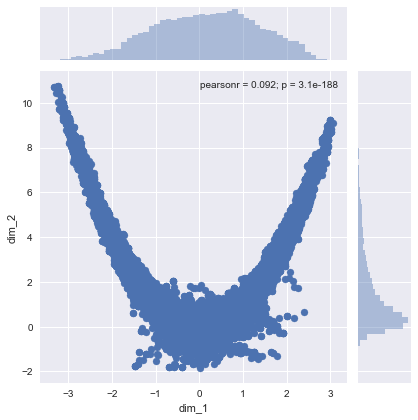

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [4]:
hist.acceptance_rate

0.61417999999999995

Use ensemble of size 3, scale=0.2. Ensemble seems to be making the acceptance prob extremely high.

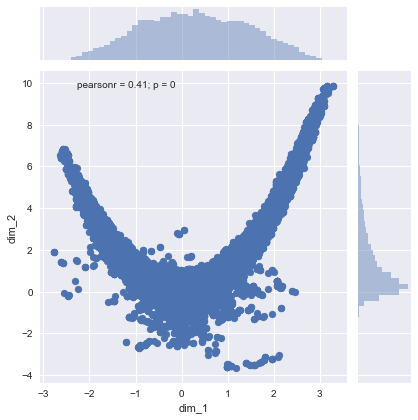

In [5]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [6]:
hist.acceptance_rate

0.64907000000000004

Ensemble with pCN, beta=0.2  
This could come from the theory behind pCN sampling, i.e. it preserves the underlying Gaussian measure.

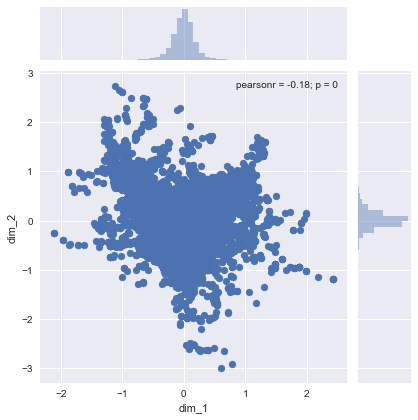

In [15]:
proposal = PCNWalkMove(s=3, beta=0.15)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [16]:
hist.acceptance_rate

0.98097000000000001

Ensemble with pCN, start from the end position of isotropic gaussian proposal

In [3]:
niter = 10
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
p0 = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True).curr_pos

In [4]:
niter = 1000
proposal.s = 3
proposal.beta = 0.2

sampler.reset()
hist = sampler.run_mcmc(niters, p0=p0, store=True)

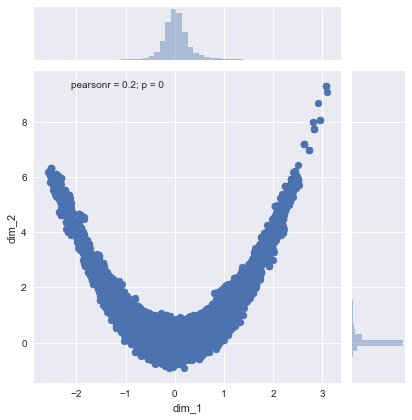

In [5]:
hist.plot_scatter(dim=[[0, 1]])

In [6]:
hist.acceptance_rate

0.94501000000000002